In [ ]:
!pip install celluloid

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from celluloid import Camera

In [ ]:
def make_transition_matrix(n_squares):
    base_row = np.zeros(n_squares)
    base_row[1:7] = 1/6
    rows = [base_row]
    for i in range(n_squares-1):
        base_row = np.insert(base_row[:-1], 0, 0)
        rows.append(base_row)
    transition_mat =  np.matrix(rows)
    for i in range(n_squares):
        transition_mat[i,i] = 1 - np.sum(transition_mat[i,:])
    return transition_mat

def make_gif(transition_matrix, n_iterations):
    # Start at first square
    start_sqr = 0
    state = np.zeros(len(transition_matrix))
    state[start_sqr] = 1
    state = np.matrix([state])

    fig = plt.figure()
    camera = Camera(fig)
    for i in range(n_iterations):
        # Need this in order to plot properly
        state = np.asarray(state).flatten()
        plt.plot(state, 'b')
        plt.ylim([0,0.1])
        camera.snap()
        state = state * transition_matrix
    animation = camera.animate(interval = 200, repeat = True, repeat_delay = 500)
    return HTML(animation.to_html5_video())
    # animation.save(base_name + '.gif', writer="imagemagick")

def add_chutes_ladders(transition_matrix, chutes_ladders):
    for start, end in chutes_ladders:
        transition_matrix[:, end-1] += transition_matrix[:, start-1]
        transition_matrix[:, start-1] = 0
    return transition_matrix

def average_turns(transition_matrix, n_iterations=1000):
    state = np.zeros(len(transition_matrix))
    state[0] = 1
    state = np.matrix([state])
    prob_done = [state[0, -1]]
    for i in range(n_iterations):
        state = state * transition_matrix
        prob_done.append(state[0, -1])
    prob_finish_turn = np.diff(prob_done)
    mean_turns = 0
    for i in range(n_iterations):
        mean_turns += (i+1) * prob_finish_turn[i]
    return mean_turns

42.540505890231174


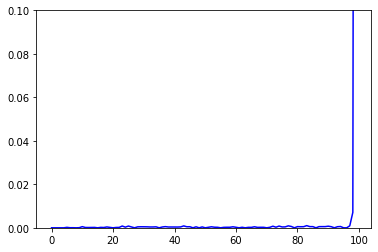

In [ ]:
np.set_printoptions(precision=3, suppress=True, linewidth=200)
n_squares = 100
chutes_ladders = [(2,38),(4,14),(9,31),(21,38),(28,84),(36,44),(51,67),(80,99),(71,91),(97,78),(96,75),(93,73),(87,24),(62,19),(64,60),(56,53),(47,26),(49,11),(16,6)]
transition_mat = make_transition_matrix(n_squares)
transition_mat = add_chutes_ladders(transition_mat, chutes_ladders)
print(average_turns(transition_mat))
make_gif(transition_mat, 100)